# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. **Do not forget, this is a Classification problem!**

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Check if is there any overfitting and underfitting. Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Ozan Evkaya</h2>

# Data

In [131]:
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [132]:
# Load the dataset as wine
wine = pd.read_csv("winequality.csv")
#No missing value
print(wine.isna().sum())
#to see the first 5 values from the new data set 
print(wine.head())
# Variable information as type 
print(wine.info())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.2

In [114]:
# Summary statistics
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

Attribute Information:

Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

In [115]:
wine["quality"].value_counts()
# The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones).

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [133]:
# Create the quality label based on the quality score
# Low for less than 5
# medium for between 5 and 6
# High for more than 7
wine['quality_label'] = wine.quality.apply(lambda q: 'low' if q <= 5 else 'high')
print(wine.head())

# See proportion of three level of wines
wine['quality_label'].value_counts()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality quality_label  
0      9.4        5           low  
1      9.8    

high    855
low     744
Name: quality_label, dtype: int64

# Exploratory Data Analysis

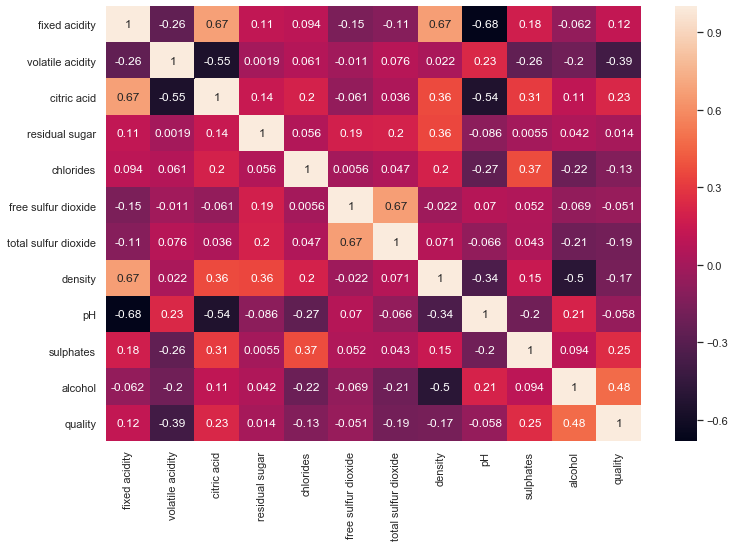

In [134]:
# Check the strength of the correlation among the variables
plt.figure(figsize=(12,8))
ax = sns.heatmap(wine.corr(), annot=True)
plt.show()

In [135]:
# alcohol, density, volatile acidity, chlorides influence the quality of wine in the order.
wine.corr()[['quality']].sort_values(by='quality', ascending = False)


,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


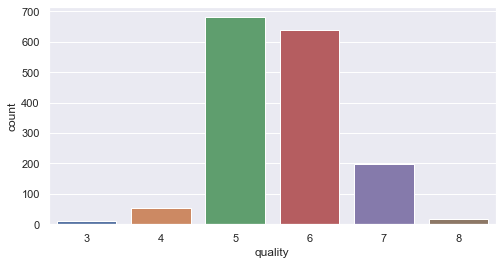

In [137]:
# Our label distribution (countplot)
sns.countplot(x="quality", data=wine)

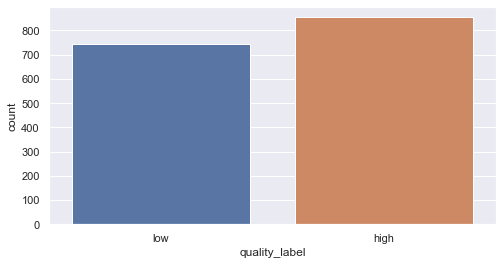

In [136]:
sns.countplot(x="quality_label", data=wine)

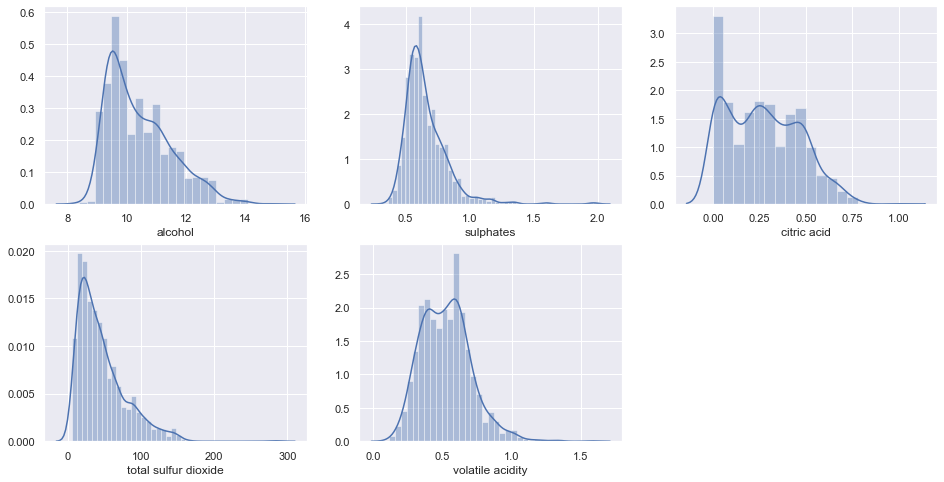

In [74]:
# Example EDA (distplot)
from pylab import *
plt.figure(figsize=(16, 8))
#sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
# Positively correlated predictors
subplot(2,3,1)
sns.distplot(wine["alcohol"], label='alcohol')
subplot(2,3,2)
sns.distplot(wine["sulphates"], label='sulphates')
subplot(2,3,3)
sns.distplot(wine["citric acid"], label='citric acid') 
# Negatively correlated predictors
subplot(2,3,4)
sns.distplot(wine["total sulfur dioxide"], label='total sulfur dioxide') 
subplot(2,3,5)
sns.distplot(wine["volatile acidity"], label='volatile acidity')
plt.show()
# Normality is violated for all of them and each has different range so that we need to normalize them as feature scaling
# Lets continue with these predictors only 

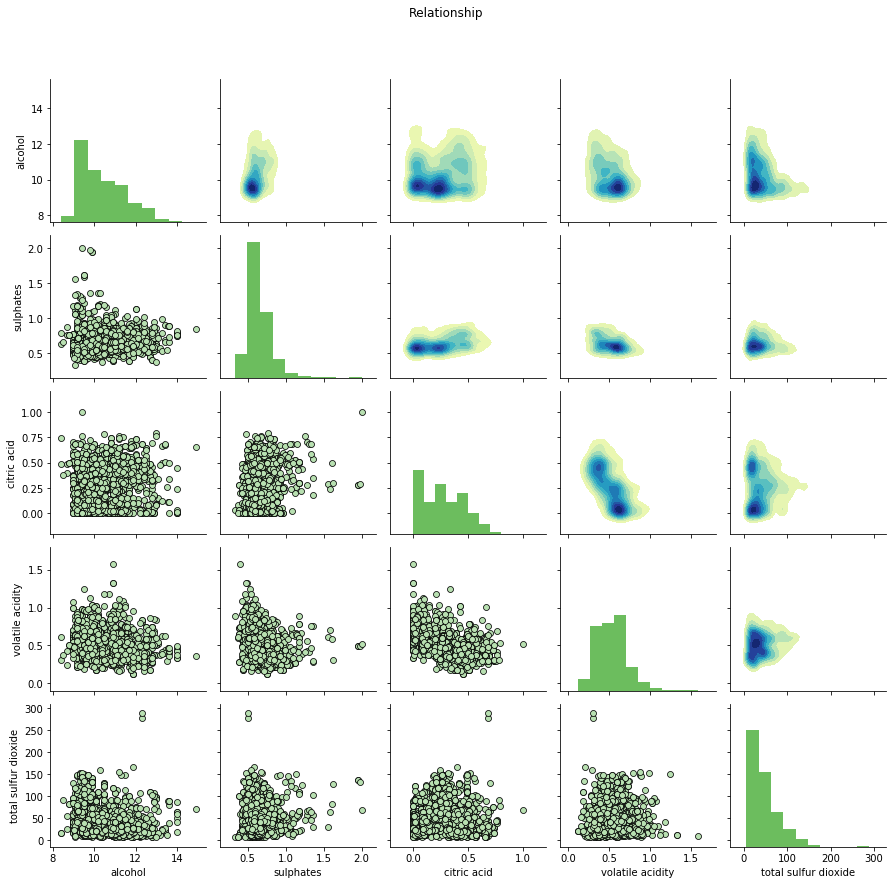

In [63]:
SelPredic = sns.PairGrid(wine[['alcohol','sulphates','citric acid','volatile acidity', 'total sulfur dioxide']])
SelPredic = SelPredic.map_upper(sns.kdeplot, cmap='YlGnBu', shade=True, shade_lowest=False)
SelPredic = SelPredic.map_diag(plt.hist, color='#6cbd5e')
SelPredic = SelPredic.map_lower(sns.scatterplot, color='#b8e0b1', edgecolor='k')

SelPredic.fig.tight_layout()
SelPredic.fig.suptitle('Relationship')
plt.subplots_adjust(top=0.9)
# We can observe non-normality in the histograms in diagonal section 
# The relationship between predictors in terms of scatterplots

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [138]:
wine.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

In [88]:
# Chose the 5 predictors 
wine_pred = wine[["volatile acidity", "citric acid", "total sulfur dioxide", "sulphates", 
                 "alcohol"]]
# We need scaling since the data sets are not normal  
print(wine_pred.head())
#type(wine_NEW)


   volatile acidity  citric acid  total sulfur dioxide  sulphates  alcohol
0              0.70         0.00                  34.0       0.56      9.4
1              0.88         0.00                  67.0       0.68      9.8
2              0.76         0.04                  54.0       0.65      9.8
3              0.28         0.56                  60.0       0.58      9.8
4              0.70         0.00                  34.0       0.56      9.4


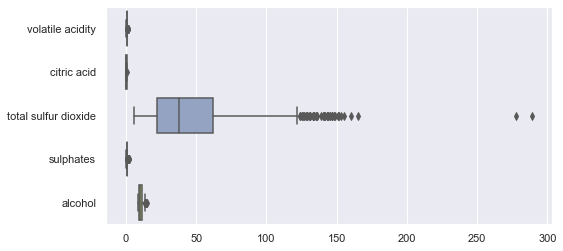

In [148]:
# boxplots of the selected predictors
sns.boxplot(data=wine_pred, orient="h", palette="Set2")

In [139]:
# Scaling the predictors
#pred_new = wine_pred.drop('index', axis = 1)
#print(pred_new)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
pred_scaled = MinMaxScaler().fit_transform(wine_pred)
pred_scaled
type(pred_scaled)

pred_new = pd.DataFrame(data=pred_scaled, columns=["volatile acidity", "citric acid",
                                                  "total sulfur dioxide", "sulphates","alcohol"])
type(pred_new)
print(pred_new.head())

   volatile acidity  citric acid  total sulfur dioxide  sulphates   alcohol
0          0.397260         0.00              0.098940   0.137725  0.153846
1          0.520548         0.00              0.215548   0.209581  0.215385
2          0.438356         0.04              0.169611   0.191617  0.215385
3          0.109589         0.56              0.190813   0.149701  0.215385
4          0.397260         0.00              0.098940   0.137725  0.153846


In [163]:
# Separate feature variables and target variable
wine.columns
features = pred_new


# Encoding label
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
wine["Label"] = label_encoder.fit_transform(wine['quality_label']) 

print(wine.head())

# Note that 0 represents High quality, 1 represents Low quality
# Checking encoded labels
quality_categories = list(label_encoder.inverse_transform([0, 1]))
print(quality_categories)

label = wine["Label"]

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality quality_label  Label  
0      9.4        5           low      1  


In [193]:
#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(pred_new, label, test_size=0.3, random_state=10)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

# DECISION TREE ALGORITHM

In [194]:
#Apply DecisionTree algorithm 

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.7855227882037533
Accuracy of test: 0.7333333333333333


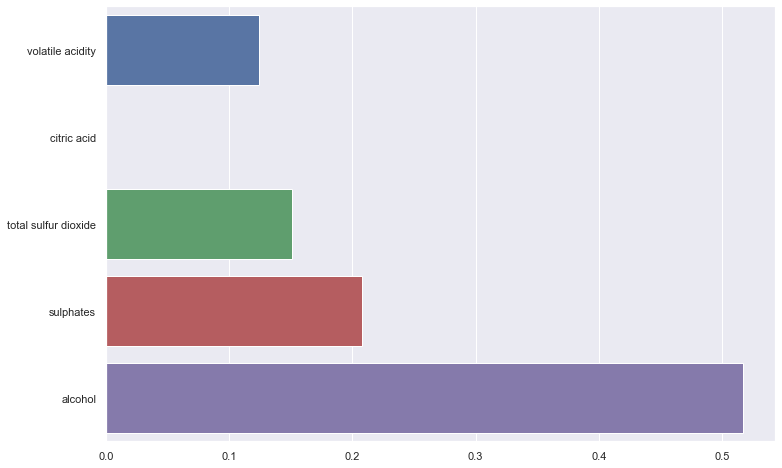

In [170]:
#Feature Importance among the 5 features
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=wine_pred.columns)
plt.show()

In [171]:
#Based on Decision tree model, alcohol is the most important feature to defined the quality is low or high for wine
# Classification Report for Decision Tree fitting
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       252
           1       0.73      0.69      0.71       228

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



In [172]:
# Metric calculation 
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.7333637832900007
Recall = 0.731203007518797
Accuracy = 0.7333333333333333
F1 Score = 0.7316514963573786


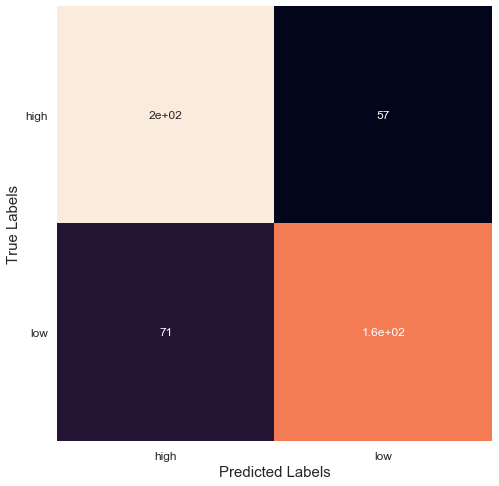

In [173]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(quality_categories, fontsize = 12)
ax.yaxis.set_ticklabels(quality_categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

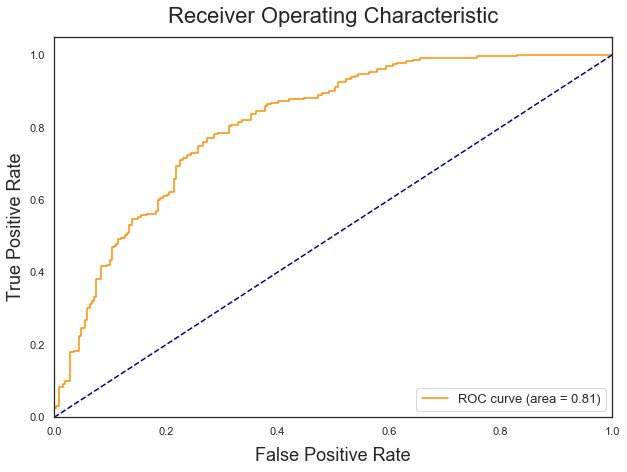

In [174]:
#Calculate the ROC curve for the fitted model 
from sklearn.metrics import roc_curve, auc

y_pred_prop = final_model.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

# LOGISTIC REGRESSION PART 

In [176]:
# Applying logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate

#Scaled data set over label2
X_train, X_test, y_train, y_test = train_test_split(pred_new, label, test_size=0.3, random_state=10)

models = LogisticRegression(random_state=10, n_jobs=-1)
cv = cross_validate(models, X_train, y_train, cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.7497765862377123
Test accuracy: 0.7395833333333334


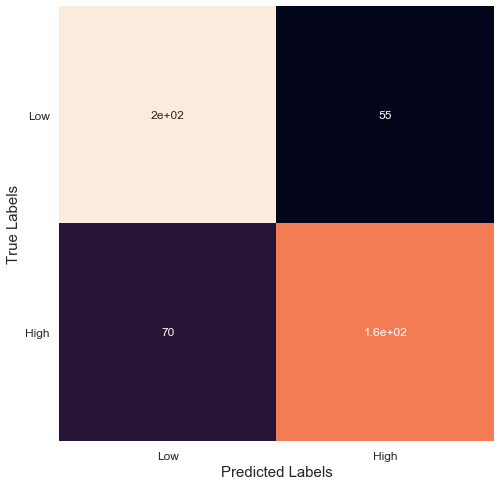

In [177]:
# Looking at the confusion matrix 
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["Low","High"], fontsize = 12)
ax.yaxis.set_ticklabels(["Low","High"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [178]:
# Look at metrics for evaluation 
print(classification_report(y_test, cv["estimator"][0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       252
           1       0.74      0.69      0.72       228

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480



In [179]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

final_model = cv["estimator"][0]

y_pred = final_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.7395833333333334
Precision: 0.7417840375586855
Recall: 0.6929824561403509
F1 Score: 0.7165532879818594


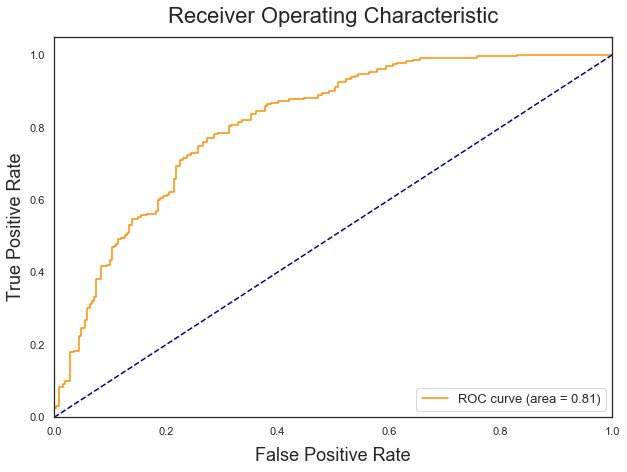

In [180]:
#Calculate the ROC curve for the fitted model 
from sklearn.metrics import roc_curve, auc

y_pred_prop = final_model.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

# SVM 

In [188]:
# support vector machine model as a third alternative
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.74375


In [189]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.74375
Precision: 0.7272727272727273
Recall: 0.7368421052631579
F1 Score: 0.7320261437908497


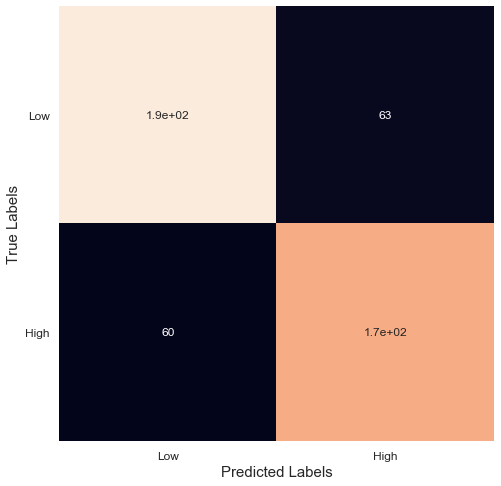

In [191]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["Low","High"], fontsize = 12)
ax.yaxis.set_ticklabels(["Low","High"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

For classification the suitable evaulation metric is : Accuracy
When there are roughly equal number of samples belonging to each class.
high quality: 855 and low quality: 744 so that focus on first accuracy measure.

In terms of the test data sets we get; 

For Decision Tree model: 
Accuracy = 0.7333333333333333

For Logistic Regression model: 
Accuracy = 0.7395833333333334

For SVM with linear kernel:
Accuracy: 0.74375 

It seems that, based on the model building with almost default parameters under 3 model settings, SVM has certain potential to investigate further since it has higher accuracy. Then the second accurate one is Logistic regression compared to the Decision Tree model for the above classification problem (low or high quality for wine). Among the 5 features, the most important one is the alcohol to identify the quality of wine. 

In terms of true and predicted labels, SVM performs better in terms of the decreased number of "low" label predictions while the true label is "high" (60). However, it is not so good at the other way around comparable to other models. 

But still, we need to consider the impact of outliers by detecting and removing them if necessary to improve the models. Instead of considering 5 features, selected in advance in terms of correlation, one can apply the model using all predictors. Furthermore, other type of ensemble based classification approaches can be implemented to make a comprehensive comparison to get the best model for this classification problem (I decided to try SVM, to add another type not mentioned during the course intentionally). More effort should be spent on the hypertunning of the parameters especially when XGBoost approach is included. 
